In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [10]:
# Plate dimensions
PLATE_X = 237.62 # mm
PLATE_Y = 237.62 # mm
CENTER_X = PLATE_X / 2
CENTER_Y = PLATE_Y / 2

# Save plate dimensions
with open('plate_dims.txt', 'w') as f:
    f.write(f'{PLATE_X}\n{PLATE_Y}')

In [3]:
# Get target numbers
n = np.arange(1, 181)
arg_n = np.where(((n-1) // 12) % 2 == 1, 0, 1)
front_n = n[arg_n == 1]
back_n = n[arg_n == 0]

# Read the data from the csv file
front_data = np.genfromtxt("front_data.csv", delimiter=",")
front_x = front_data[:, 0]
front_y = -front_data[:, 1] # Flip the y values cause drawing coordinate is upside down

back_data = np.genfromtxt("back_data.csv", delimiter=",")
back_x = back_data[:, 0]
back_y = -back_data[:, 1] # Flip the y values cause drawing coordinate is upside down

# Get distance of targets from center
front_radii = np.sqrt((front_x - CENTER_X) ** 2 + (front_y - CENTER_Y) ** 2)
back_radii = np.sqrt((back_x - CENTER_X) ** 2 + (back_y - CENTER_Y) ** 2)

merged_radii = []
for i in range(0, len(front_radii), 12):
    merged_radii.extend(front_radii[i:i+12])
    merged_radii.extend(back_radii[i:i+12])
merged_radii = np.array(merged_radii)

In [4]:
# Export the target number and radii data to a csv file
df = pd.DataFrame({"Target Number": n, "Radius": merged_radii})
df.to_csv("target_radii.csv", index=False)

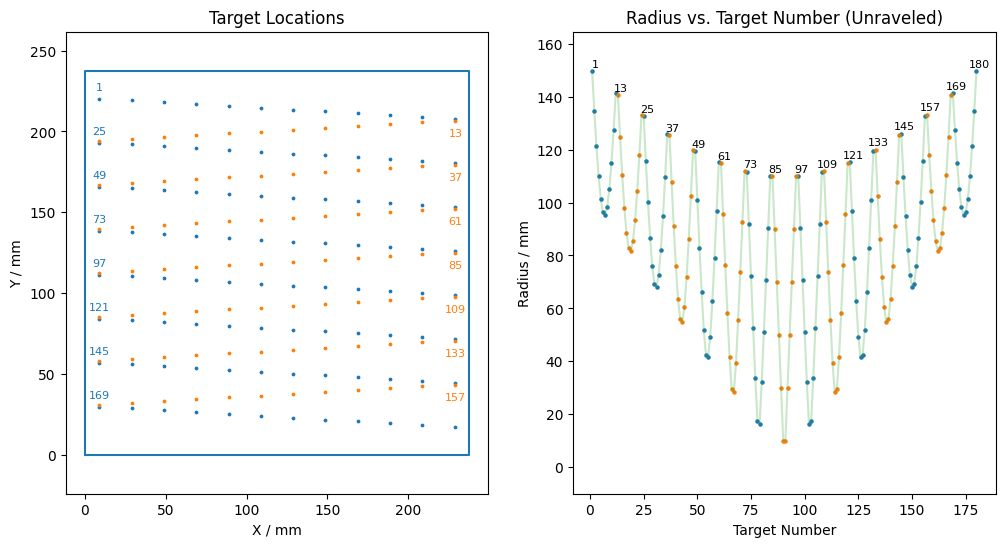

In [5]:
## Plotting ##

# Create the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Target Location Plot
for i, nn in enumerate(front_n):
    if (nn+11) % 12 == 0:
        ax1.annotate(nn, (front_x[i], -front_y[i]+2*CENTER_Y), fontsize=8, xytext=(front_x[i], -front_y[i]+2*CENTER_Y+5), c='C0', ha='center')
for i, nn in enumerate(back_n):
    if (nn+11) % 12 == 0:
        ax1.annotate(nn, (back_x[i], -back_y[i]+2*CENTER_Y), fontsize=8, xytext=(back_x[i]+PLATE_X-17.5, -back_y[i]+2*CENTER_Y-10), c='C1', ha='center')

square_x = [0, PLATE_X, PLATE_X, 0, 0]
square_y = [0, 0, PLATE_Y, PLATE_Y, 0]
ax1.plot(square_x, square_y)
ax1.scatter(-front_x+PLATE_X, front_y, s=3, c='C0', label='Front') # Flip the x values for plotting only
ax1.scatter(back_x, back_y, s=3, c='C1', label='Back')
ax1.set_xlabel('X / mm')
ax1.set_ylabel('Y / mm')
ax1.axis("equal")
ax1.set_title('Target Locations')

# Target Point Radius Plot
for i in range(0, len(n), 12):
    ax2.annotate(str(i+1), (n[i], merged_radii[i]), fontsize=8, xytext=(n[i]+1.5, merged_radii[i]+0.75), ha='center', va='bottom')
ax2.annotate(str(180), (n[-1], merged_radii[-1]), fontsize=8, xytext=(n[-1]+1.5, merged_radii[-1]+0.75), ha='center', va='bottom')

ax2.scatter(front_n, front_radii, s=5)
ax2.scatter(back_n, back_radii, s=5)
ax2.plot(n, merged_radii, c='C2', alpha=0.25)
ax2.set_xlabel('Target Number')
ax2.set_ylabel('Radius / mm')
ax2.set_ylim(-10, np.max(merged_radii) + 15)
ax2.set_title('Radius vs. Target Number (Unraveled)')
plt.show()

# Save the figure
fig.savefig('target_locations.png', dpi=200)

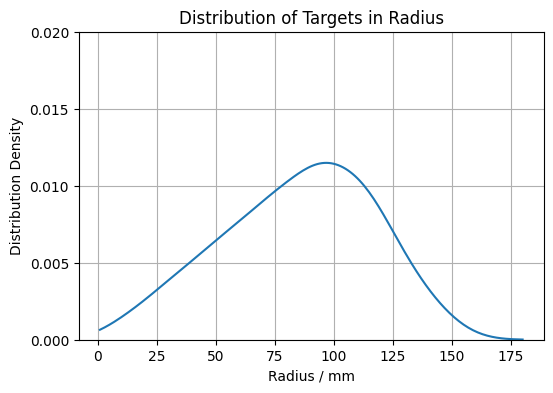

In [6]:
# Get distribution of radii
kde_radii = gaussian_kde(merged_radii)

# Create the figure
fig = plt.figure(figsize=(6, 4))
plt.plot(n, kde_radii(n))
plt.xlabel('Radius / mm')
plt.ylabel('Distribution Density')
plt.ylim(0, 0.02)
plt.yticks(np.arange(0, 0.021, 0.005))
plt.title('Distribution of Targets in Radius')
plt.grid()
plt.show()

# Save the figure
fig.savefig('target_radius_distribution.png', dpi=200)